In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [23]:
# Load dataset
dataset = pd.read_csv('car-details-from-car-dekho.csv')
print(dataset.head())
print(dataset.tail())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
                                     name  year  selling_price  km_driven  \
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338   

In [26]:
# Print columns to confirm structure
print("Columns in dataset:", dataset.columns)

Columns in dataset: Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')


In [28]:
# Encode categorical variables
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']
for column in categorical_columns:
    dataset[column] = pd.factorize(dataset[column])[0]

In [29]:
# Define features and scale them
X = dataset[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Apply KMeans clustering to segment cars into price categories
kmeans = KMeans(n_clusters=3, random_state=42)
dataset['cluster'] = kmeans.fit_predict(X_scaled)

In [31]:
# Map cluster labels to car categories
dataset['category'] = dataset['cluster'].map({
    0: 'Budget-Friendly',
    1: 'Mid-Range',
    2: 'Luxury'
})

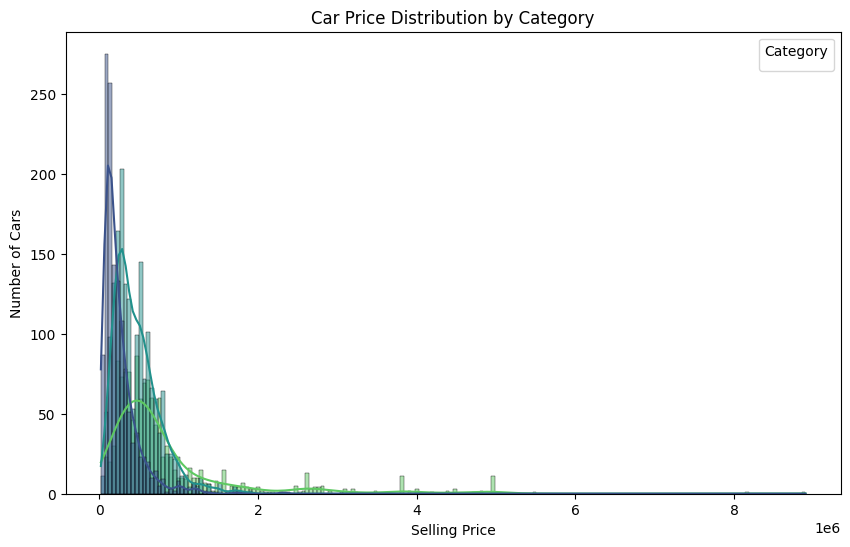

In [32]:
# Plot distribution of car prices by category
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='selling_price', hue='category', kde=True, palette='viridis')
plt.title("Car Price Distribution by Category")
plt.xlabel("Selling Price")
plt.ylabel("Number of Cars")
plt.legend(title='Category')
plt.show()

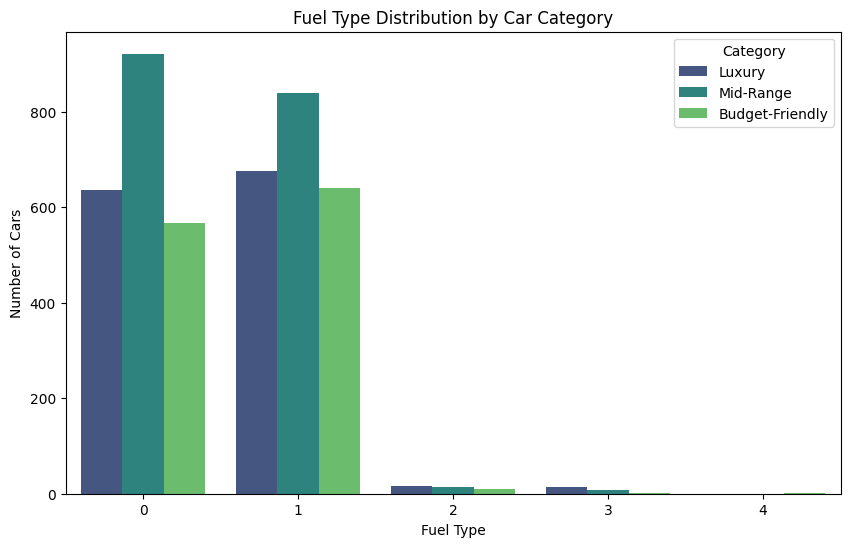

In [33]:
# Plot fuel type distribution for each category
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='fuel', hue='category', palette='viridis')
plt.title("Fuel Type Distribution by Car Category")
plt.xlabel("Fuel Type")
plt.ylabel("Number of Cars")
plt.legend(title='Category')
plt.show()

In [34]:
# Function to recommend cars based on budget and other preferences
def recommend_cars(budget, fuel_type=None, transmission=None):
    recommendations = dataset[(dataset['selling_price'] <= budget)]
    if fuel_type is not None:
        recommendations = recommendations[recommendations['fuel'] == fuel_type]
    if transmission is not None:
        recommendations = recommendations[recommendations['transmission'] == transmission]
    return recommendations[['year', 'km_driven', 'selling_price', 'category']]

In [35]:
# Example recommendations
print(recommend_cars(budget=500000, fuel_type=1, transmission=1).head())

      year  km_driven  selling_price         category
37    2011     130400         450000  Budget-Friendly
938   2010      87620         290000  Budget-Friendly
986   2007     110000         400000           Luxury
1048  2010     130000         400000           Luxury
1129  2010     195000         380000           Luxury
